In [11]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold,TimeSeriesSplit
import numpy as np
from sklearn.metrics import roc_auc_score

import gc
import seaborn as sns
import matplotlib.pyplot as plt


import lightgbm as lgb

In [ ]:
lgb.

In [106]:
plt.style.use('ggplot') #ggplot스타일 사용
#한글폰트 사용
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)

---
# data parsing
---

In [2]:
txt_df = pd.read_table('sa_heart_disease.txt',sep=',')

In [3]:
txt_df.drop(columns = 'row.names',inplace = True)

---
# classification modeling
---

In [9]:
txt_df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

---
### 1. Logistic Regression
---
- softmax지원 알고리즘을 사용하여 결과갓에 대한 정확도는 73%정도로 꽤 높은 수준

In [52]:
'''train_test_split로도 가능'''
y = txt_df.iloc[:,9]
x = txt_df.iloc[:,:9]

In [53]:
le = LabelEncoder()
le.fit(list(x['famhist'].values))
x['famhist'] = le.transform(list(x['famhist'].values))

In [58]:
txt_df['famhist'] = le.transform(list(txt_df['famhist'].values))

In [16]:
'''로지스틱회귀 데이터 학습
solver = 분해용법
lbfgs : softmax회귀를 지원하는 알고리즘
ovr : 알고리즘이름인데 추후 알아볼 것 '''
LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr')

'''선형회귀에서 규제가 추가된 것'''
'''릿지 prediction'''
#from sklearn.linear_model import Ridge 
#alpha는 규제도를 조절 -> 0에 가까울수록 선형회귀와 같아짐
#ridge_reg = Ridge(alpha=1, solver="cholesky")#쇼레스키 분해 용법 사용 
#ridge_reg.fit(X, Y)
#ridge_reg.predict([[1.5]])

'''라쏘'''
'''라쏘회귀는 덜 중요한 특성의 가중치를 완전 제거하려는 점이 특징'''
#from sklearn.linear_model import Lasso 
#lasso_reg = Lasso(alpha=0.1)
#lasso_reg.fit(X, Y)
#lasso_reg.predict([[1.5]])

'''엘라스틱넷 - 라쏘와 릿지를 혼합
r = 0 : 릿지
r = 1 : 라쏘'''
#from sklearn.linear_model import ElasticNet
#elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
#elastic_net.fit(X,Y)
#elastic_net.predict([[1.5]])

'엘라스틱넷 - 라쏘와 릿지를 혼합\nr = 0 : 릿지\nr = 1 : 라쏘'

In [26]:
LR.fit(x,y)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [30]:
LR.predict(x.iloc[450:,:])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [31]:
'''로지스틱 정확도 -> score가 정확히 뭐지... 정확도는 아닌듯'''
LR.score(x,y)

0.7359307359307359

In [33]:
'''양성/음성의 시그모이드 예측 확률 값'''
LR.predict_proba(x.iloc[450:,:])

array([[0.87854791, 0.12145209],
       [0.924622  , 0.075378  ],
       [0.54795593, 0.45204407],
       [0.47920793, 0.52079207],
       [0.83333158, 0.16666842],
       [0.82960649, 0.17039351],
       [0.61919272, 0.38080728],
       [0.73122497, 0.26877503],
       [0.75199501, 0.24800499],
       [0.70694988, 0.29305012],
       [0.41461202, 0.58538798],
       [0.10484853, 0.89515147]])

---
### SVM
---
- 정확도가 상대적으로 떨어지는 것을 확인가능 svm = 0.37

In [35]:
'''SVC는 클래스 분류
SVR은 수치값 예측하는 regression'''
SVM = svm.LinearSVC()
SVM.fit(x,y)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [36]:
SVM.predict(x.iloc[450:,:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
SVM.score(x,y)

0.37445887445887444

---
### RF
---

In [149]:
x_train, x_test, y_train, y_test = train_test_split(txt_df.iloc[:,:9], 
                                                    np.array(txt_df['chd'].tolist()), 
                                                    test_size=0.2, 
                                                    stratify=np.array(txt_df['chd'].tolist()), 
                                                    random_state=123456)

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)
y_train = pd.Series(y_train)

columns = x_train.columns
splits = folds.split(x_train, y_train)
y_preds = np.zeros(x_test.shape[0])
y_oof = np.zeros(x_train.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

In [ ]:
for fold_n, (train_index,valid_index) in enumerate(splits):
    x_train2, x_valid = x_train.iloc[train_index],x_train.iloc[valid_index]
    y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    RF = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    RF.fit(x_train2,y_train2)
    
    
    
    

In [146]:
accuracy_score(RF.predict(x_test),y_test)

0.6774193548387096

In [147]:
roc_auc_score(RF.predict(x_test),y_test)

0.6433734939759036

---
#### Neural Net
---
- 다층 신경 퍼셉트론인 MLP이용하여 예측

In [46]:
NN =MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,2),random_state=1)

In [48]:
NN.fit(x,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
NN.predict(x.iloc[450:,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
NN.score(x,y)

0.6536796536796536

---
### xgbooting
---
- 교차검증

In [151]:
x_train, x_test, y_train, y_test = train_test_split(txt_df.iloc[:,:9], 
                                                    np.array(txt_df['chd'].tolist()), 
                                                    test_size=0.2, 
                                                    stratify=np.array(txt_df['chd'].tolist()), 
                                                    random_state=123456)

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)
y_train = pd.Series(y_train)

columns = x_train.columns
splits = folds.split(x_train, y_train)
y_preds = np.zeros(x_test.shape[0])
y_oof = np.zeros(x_train.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

In [152]:
score = 0
for fold_n, (train_index, valid_index) in enumerate(splits):
    x_train2, x_valid = x_train[columns].iloc[train_index], x_train[columns].iloc[valid_index]
    y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    #dtrain = xgb.DMatrix(data=x_train2,label=y_train2)
    #dvalid = xgb.DMatrix(data=x_valid, label=y_valid)
    
    #모델 생성(classification, regressor)
    xgb_class = xgb.XGBClassifier(n_estimators=1000,random_state=0,max_depth=2,eval_metric='auc')
    #모델 학습 (train,valid)
    xgb_class.fit(x_train2,y_train2)
    
    feature_importances[f'fold_{fold_n + 1}'] = xgb_class.feature_importances_
    y_pred_valid = xgb_class.predict(x_valid)
    y_oof[valid_index] = y_pred_valid
    
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += xgb_class.predict(x_test) / NFOLDS
    #y_test와의 성능 비교는 auc를 평가척도로 놓았기 때문에 그대로 y_test와 auc로 성능을 검증하면 됨
    #근데 의문은 1/0으로 binary로 결과치가 도출되는데 왜 predict_proba로 예측을 하지 않지?
    
    #데이터 메모리를 최적화하면서 모델링 진행
    del x_train2, x_valid, y_train2, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y_train, y_oof)}")

Fold 1 | AUC: 0.6383333333333333
Fold 2 | AUC: 0.553030303030303
Fold 3 | AUC: 0.7098214285714286
Fold 4 | AUC: 0.6109613656783469
Fold 5 | AUC: 0.6323260073260074

Mean AUC = 0.6288944875878838
Out of folds AUC = 0.6267343101659751


In [101]:
#각 변수의 cross_validation별 평균 변수중요도
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)

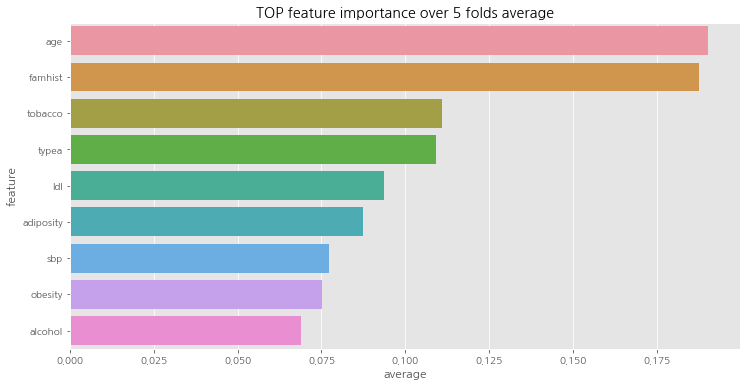

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False), x='average', y='feature');
plt.title('TOP feature importance over {} folds average'.format(folds.n_splits));

---
### Light GBM Classification
---
- 교차검증

In [154]:
x_train, x_test, y_train, y_test = train_test_split(txt_df.iloc[:,:9], 
                                                    np.array(txt_df['chd'].tolist()), 
                                                    test_size=0.2, 
                                                    stratify=np.array(txt_df['chd'].tolist()), 
                                                    random_state=123456)

NFOLDS = 5
folds = KFold(n_splits=NFOLDS)
y_train = pd.Series(y_train)

columns = x_train.columns
splits = folds.split(x_train, y_train)
y_preds = np.zeros(x_test.shape[0])
y_oof = np.zeros(x_train.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

In [155]:
for fold_n, (train_index, valid_index) in enumerate(splits):
    x_train2, x_valid = x_train[columns].iloc[train_index], x_train[columns].iloc[valid_index]
    y_train2, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    
    #dtrain = lgb.Dataset(x_train2, label=y_train2)
    #dvalid = lgb.Dataset(x_valid, label=y_valid)
    
    #clf = lgb.train(params, dtrain, 1000, valid_sets = [dtrain, dvalid], verbose_eval=200,early_stopping_rounds=500)
    lgb_class = lgb.LGBMClassifier(eval_metric = 'auc',objective='binary', class_weight='balanced',n_estimators=1000)
    lgb_class.fit(x_train2,y_train2)
    
    feature_importances[f'fold_{fold_n + 1}'] = lgb_class.feature_importances_
    
    y_pred_valid = lgb_class.predict(x_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += lgb_class.predict(x_test) / NFOLDS
    
    del x_train2, x_valid, y_train2, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y_train, y_oof)}")

Fold 1 | AUC: 0.6075
Fold 2 | AUC: 0.6143939393939394
Fold 3 | AUC: 0.6979166666666667
Fold 4 | AUC: 0.573225516621743
Fold 5 | AUC: 0.6227106227106227

Mean AUC = 0.6231493490785944
Out of folds AUC = 0.6220986773858921


In [137]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n+1}' for fold_n in range(folds.n_splits)]].mean(axis=1)

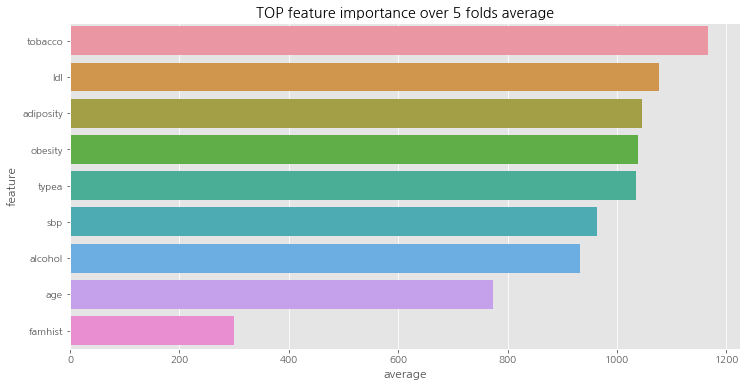

In [138]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False), x='average', y='feature');
plt.title('TOP feature importance over {} folds average'.format(folds.n_splits));

---
# Multiple classification(class 3개이상)
---

In [4]:
v_train = pd.read_table('vowel_train.txt',sep=',')
v_test = pd.read_table('vowel_test.txt',sep=',')

v_train.drop(columns='row.names',inplace=True)
v_test.drop(columns='row.names',inplace=True)

In [5]:
v_train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
0,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [6]:
x_tr = v_train.iloc[:,1:]
y_tr = v_train.iloc[:,0]

x_te = v_test.iloc[:,1:]
y_te = v_test.iloc[:,0]

In [59]:
'''perfect balance data / 10 class'''
y_tr.value_counts()

11    48
10    48
9     48
8     48
7     48
6     48
5     48
4     48
3     48
2     48
1     48
Name: y, dtype: int64

---
### Logistic Regression
---

In [60]:
LR = LogisticRegression(random_state=0,solver = 'lbfgs', multi_class='multinomial')
LR.fit(x_tr,y_tr)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
LR.score(x_te,y_te)

0.461038961038961

In [65]:
confusion_matrix(y_te,LR.predict(x_te))

array([[34,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17, 18,  5,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  7, 18, 12,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 27,  0, 13,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7, 12, 15,  8,  0,  0,  0,  0],
       [ 0,  0,  5,  6,  5, 17,  1,  0,  0,  0,  8],
       [ 0,  4,  0,  1, 14,  9,  8,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0, 22, 14,  2,  0],
       [ 0,  1,  1,  0,  0,  0,  2,  7, 21,  6,  4],
       [ 8,  0,  6,  0,  0,  0,  0,  7,  1, 14,  6],
       [ 0,  2,  2,  2,  0,  9,  2,  0,  2,  1, 22]], dtype=int64)

In [77]:
'''멀티클래스 분류에서의 auc구하는 함수'''
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    #멀티클래스를 이항 분류?? 
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average=average)

In [80]:
multiclass_roc_auc_score(y_te,LR.predict(x_te))

0.7035714285714285

---
### SVM
---

In [81]:
'''svm에서 다중분류를 도와주는 파라미터'''
SVM = svm.SVC(decision_function_shape='ovo').fit(x_tr,y_tr)

C:\Users\tlsal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
SVM.score(x_te,y_te)

0.6406926406926406

In [84]:
multiclass_roc_auc_score(y_te,SVM.predict(x_te))

0.8023809523809523

---
### RF
---

In [85]:
RF = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0).fit(x_tr,y_tr)

In [86]:
RF.score(x_te,y_te)

0.5757575757575758

In [87]:
multiclass_roc_auc_score(y_te,RF.predict(x_te))

0.7666666666666665

---
### MLP (신경망)
---